In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd drive/My Drive/sample datasets


/content/drive/My Drive/sample datasets


In [ ]:
%ls

data.csv  nature_images/  nature_images.zip


In [ ]:
!unzip nature_images.zip

Archive:  nature_images.zip
^C


In [ ]:
cd /content/drive/My Drive/sample datasets/nature_images/train


/content/drive/My Drive/sample datasets/nature_images/train


In [ ]:
%ls

buildings/  forest/  glacier/  mountain/  sea/  street/


In [ ]:
import tensorflow as tf
#let's create our data generator 
image_generator = tf.keras.preprocessing.image.ImageDataGenerator()
test_path = '/content/drive/My Drive/sample datasets/nature_images/test'
train_path = '/content/drive/My Drive/sample datasets/nature_images/train'
image_size = 150
train_generator = image_generator.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='binary')
val_generator = image_generator.flow_from_directory(
        test_path,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='binary')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input 
image_generator_resnet50 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
train_generator_resnet50 = image_generator_resnet50.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical')
val_generator_resnet50 = image_generator_resnet50.flow_from_directory(
        test_path,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_resnet50 = tf.keras.Sequential()
model_resnet50.add(tf.keras.applications.ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model_resnet50.add(tf.keras.layers.Dense(6, activation = 'softmax'))
model_resnet50.layers[0].trainable = False
model_resnet50.summary()


94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 12,294
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
number_of_epochs = 5           #Reducing the learning rate every 2 epochs
def scheduler(epoch, lr):
    if epoch % 2 ==0:
        return lr*tf.math.exp(-0.1)
    else:
        return lr

lr_schedule= tf.keras.callbacks.LearningRateScheduler(
    scheduler, verbose=2
)


In [ ]:
model_resnet50.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])
history_resnet50 = model_resnet50.fit_generator(
        train_generator_resnet50,
        steps_per_epoch=len(train_generator_resnet50),
        epochs=5, validation_data = val_generator_resnet50,callbacks=[lr_schedule]
        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.00090483745, shape=(), dtype=float32).
110/110 [==============================] - 3826s 35s/step - loss: 0.2519 - accuracy: 0.9106 - val_loss: 0.2179 - val_accuracy: 0.9177
Epoch 2/5

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009048374486155808.
110/110 [==============================] - 1223s 11s/step - loss: 0.1891 - accuracy: 0.9332 - val_loss: 0.2084 - val_accuracy: 0.9223
Epoch 3/5

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0008187308, shape=(), dtype=float32).
110/110 [==============================] - 1227s 11s/step - loss: 0.1656 - accuracy: 0.9416 - val_loss: 0.2094 - val_accuracy: 0.9250
Epoch 4/5

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0008187307976186275.
110/110 [==============================] - 1260s 11s/step - loss: 0.1505 - accuracy: 0.9476 - val_loss: 0.1960 - val_accuracy: 0.9300
Epoch 5/5

Epoch 00005: Learn

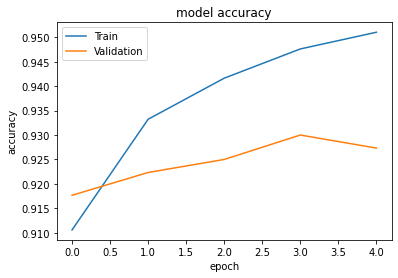

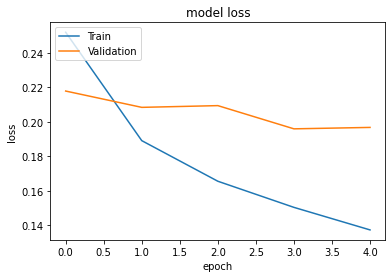

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
